# Маркетинговый анализ
***

# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Загрузка и подготовка данных](#1)**
    - [1) Импортируем библиотеки, объявим класс MetricCalculator для анализа](#1_1)
    - [2) Прочитаем данные](#1_2)
    - [3) Выведем первые и последние пять строк каждой из таблиц, общую информацию](#1_3)
    - [Вывод](#1_conclusion)
* **[II. Исследовательский анализ данных](#2)**
    - [1) Получим профили пользовтеля для анализа](#2_1)
    - [2) Установим момент и горизонт анализа данных](#2_2)
    - [3) Исследуем сведения о посещении сайтах](#2_3)
        - [из каких стран пользователи](#2_3_1)
        - [устройства пользователей](#2_3_2)
        - [рекламные каналы](#2_3_3)
    - [Вывод](#2_conclusion)
* **[III. Маркетинговый анализ](#3)**
    - [1) Выделим ключевые значения для расчетов](#3_1)
    - [2) Подсчитаем минимальный средний объём сырья в месторождениях региона, достаточный для его разработки](#3_2)
    - [3) Подготовим функцию для расчёта прибыли по набору отобранных месторождений и предсказаний модели](#3_3)
    - [Вывод](#3_conclusion)
* **[IV. Расчёт прибыли и рисков](#4)**
    - [1) Найдем распределение прибыли с помощью Bootstrap](#4_1)
    - [2) Подсчитаем среднюю прибыль, 95-% доверительный интервал и риск убытков](#4_2)
    - [Вывод](#4_conclusion)

# I. Загрузка и подготовка данных<a class='anchor' id='1'>
***

## 1) Импортируем библиотеки, объявим класс MetricCalculator для анализа<a class="anchor" id="1_1"></a>

In [1]:
# тут импорты
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from calculator.calculator import MetricCalculator
from IPython.display import display
from datetime import datetime

In [2]:
# тут класс

In [3]:
# тут полезное
pd.set_option('display.float_format', lambda x: '%.2f' % x)

[В оглавление](#TOC)

## 2) Прочитаем данные<a class="anchor" id="1_2"></a>

### - описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.


Структура visits_info_short.csv|Описание|Структура orders_info_short.csv|Описание|Структура costs_info_short.csv|Описание
:-----|:-----|:-----|:-----|:-----|:-----  
User Id|уникальный идентификатор пользователя|User Id|уникальный идентификатор пользователя|Channel|идентификатор рекламного источника
Region|страна пользователя|Event Dt|дата и время покупки|Dt|дата проведения рекламной кампании
Device|тип устройства пользователя|Revenue|сумма заказа|Costs|расходы на эту кампанию
Channel|идентификатор источника перехода| | | | 
Session Start|дата и время начала сессии| | | | 
Session End|дата и время окончания сессии| | | | 

### - создадим экземпляр класса с путями до данных, приведем наименование колонок к едином формату, установим нужный тип данных

In [4]:
calc = MetricCalculator('datasets/visits_info_short.csv', 'datasets/orders_info_short.csv', 'datasets/costs_info_short.csv')

In [5]:
calc.columns_fixer()

Cоздан экземпляр класса:
- данные прочитаны, 
- наименование колонок приведено к единому формату,
- колонки с датами приведены к соответствующему формату.

Датасеты доступны через экземпляр класса по именам **visits, orders, costs**.

## 3) Выведем первые пять первых и последних строк каждой из таблиц, общую информацию<a class="anchor" id="1_3"></a>

### - visits - посещение сайта

In [6]:
calc.visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [7]:
calc.visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


&#9889; **Вывод:** в датасете с информацией о посещениях сайта 309 901 строка, без пропусков, без проблем с типами данных.

### - orders - информация о покупках

In [8]:
calc.orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [9]:
calc.orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


&#9889; **Вывод:** в датасете с информацией о покупках 40 212 строк (13% от числа визитов), без пропусков, без проблем с типами данных.

### - costs - информация о расходах

In [10]:
calc.costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80


In [11]:
calc.costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


&#9889; **Вывод:** в датасете с информацией расходах 1800, без пропусков, без проблем с типами данных.

### - проверим наличие полных дубликатов

In [12]:
datasets = [calc.visits, calc.orders, calc.costs]
duplicated_sum = 0
for dataset in datasets:
    duplicated_sum += (dataset.duplicated() == True).sum()
print(duplicated_sum)

0


Полных дубликатов нет

## Вывод<a class="anchor" id="1_conclusion"></a>

1. Прочитали данные с помощью специального класса, наименование колонок приведено к единому формату, колонки с датами приведены к соответствующему формату. Датасеты доступны через экземпляр класса по именам visits, orders, costs.
2. Во всех датасетах нет проблем с типами данных, полные дубликаты отсутствуют, нет пропусков.

[В оглавление](#TOC)

# II. Исследовательский анализ данных<a class='anchor' id='2'>
***

## 1) Получим профили пользователей<a class="anchor" id="2_1"></a>

In [13]:
profiles = calc.get_profiles()

In [14]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


## 2) Установим момент и горизонт анализа данных<a class="anchor" id="2_2"></a>

По условиям задачи на календаре 1 ноября 2019 года, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

In [15]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

## 3) Исследуем сведения о посещении сайтах<a class="anchor" id="2_3"></a>

### - из каких стран пользователи<a class='anchor' id='2_3_1'></a>

В отношении user_id считать статистику неинформативно - поэтому исключим данный столбец**

In [16]:
calc.visits.describe(exclude=['int64']).T.fillna('---')

,count,unique,top,freq,first,last
region,309901,4,United States,207327,---,---
device,309901,4,iPhone,112603,---,---
channel,309901,11,organic,107760,---,---
session_start,309901,306813,2019-06-27 14:56:41,3,2019-05-01 00:00:41,2019-10-31 23:59:23
session_end,309901,306793,2019-07-16 02:23:30,3,2019-05-01 00:07:06,2019-11-01 01:38:46


Проверим записи о пользователях из каких стран содержит таблица, определим процент платящих:

In [17]:
countries_count_by_payer = calc.grouped_summary(profiles, 'region', 'страна')
countries_count_by_payer

,страна,платящие,% от платящих,число клиентов
0,Germany,616,6.94,14981
1,France,663,7.47,17450
2,UK,700,7.88,17575
3,United States,6902,77.72,100002
4,---,8881,100.00,150008


- из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США,
- в датасете 150 008 уникальных пользователей, из которых платят 8881 (6%).
- из 8881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии.

Визуализируем соотношение пользователей по странам:

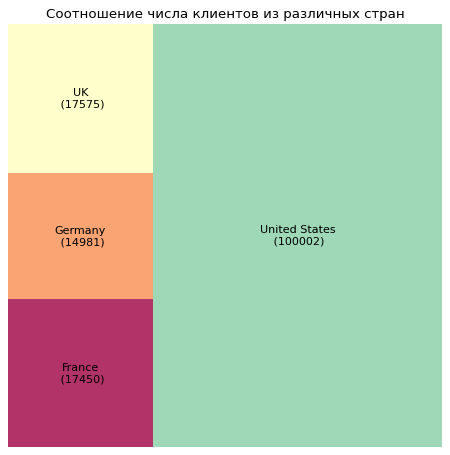

In [18]:
calc.square_plot(profiles, 'region', title='Соотношение числа клиентов из различных стран')

<Figure size 560x560 with 0 Axes>

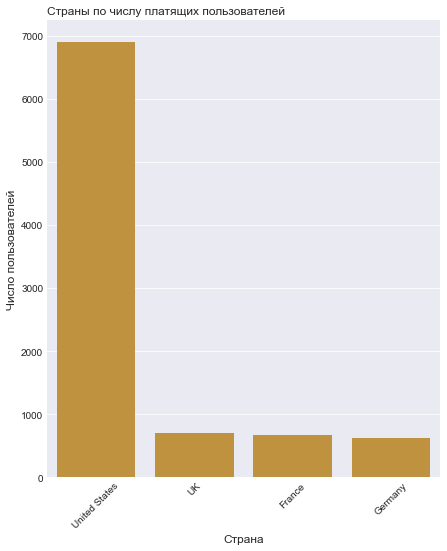

In [19]:
title = 'Страны по числу платящих пользователей'
xlabel = 'Страна'
ylabel = 'Число пользователей'
data = countries_count_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='страна', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

### - устройства пользователей<a class='anchor' id='2_3_2'></a>

In [20]:
devices_by_payer = calc.grouped_summary(profiles, 'device', 'устройство')
devices_by_payer

,устройство,платящие,% от платящих,число клиентов
0,PC,1537,17.31,30455
1,Mac,1912,21.53,30042
2,Android,2050,23.08,35032
3,iPhone,3382,38.08,54479
4,---,8881,100.00,150008


- клиенты пользвуются приложением с четырех устройств - PC, Mac, Android, iPhone,
- наблюдения об устройствах распределены равномернее, чем между странами,
- из 8881 платящих - 3382 (38.08%) пользователей iPhone, 2050 (23.08%) пользователей Android, 1912 пользователей Mac (21.53%), пользователей PC (17.31%).

Визуализируем соотношение устройств по числу уникальных пользователей:

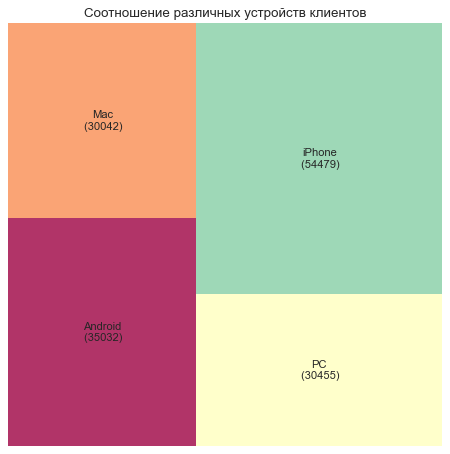

In [21]:
calc.square_plot(profiles, 'device', title='Соотношение различных устройств клиентов')

<Figure size 560x560 with 0 Axes>

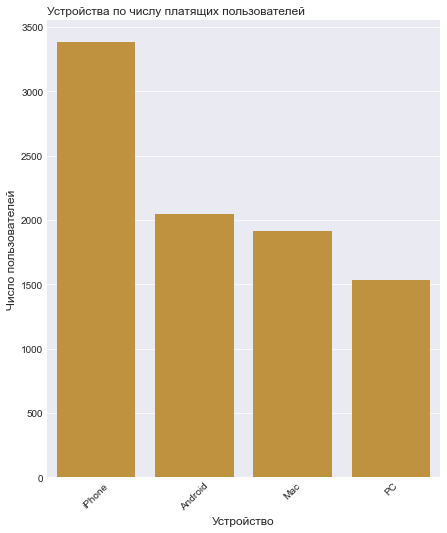

In [22]:
title = 'Устройства по числу платящих пользователей'
xlabel = 'Устройство'
ylabel = 'Число пользователей'
data = devices_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='устройство', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

### - рекламные каналы<a class='anchor' id='2_3_3'></a>

In [23]:
channels_by_payer = calc.grouped_summary(profiles, 'channel', 'канал')
channels_by_payer

,канал,платящие,% от платящих,число клиентов
0,MediaTornado,156,1.76,4364
1,YRabbit,165,1.86,4312
2,lambdaMediaAds,225,2.53,2149
3,OppleCreativeMedia,233,2.62,8605
4,LeapBob,262,2.95,8553
5,RocketSuperAds,352,3.96,4448
6,AdNonSense,440,4.95,3880
7,WahooNetBanner,453,5.10,8553
8,organic,1160,13.06,56439
9,TipTop,1878,21.15,19561


&#9889; **Вывод**

В датасете о посещениях сайта:

- сведения о 4 регионах, больше всего наблюдений о пользователях из США - 207 327 из 309 901 наблюдения (67%), больше всего пользовавшихся iPhone - 112 603 из 309 901 наблюдения (36%),
- более трети пользователей пришли напрямую - 107 760 из 309 901 (36%),
- помимо прямой покупки, с большим отрывом лидируют источники привлечения - TipTop (54 794, 18%) и FaceBoom (20204, 16%),
- самое раннее наблюдение о первом действии - 01.05.2019 года, самое позднее - 31.10.2019 года.

**В отношении user_id считать статистику неинформативно - поэтому исключим данный столбец**

### - visits - посещение сайта

In [ ]:
calc.visits.describe(exclude=['int64']).T.fillna('---')

Проверим записи о пользователях из каких стран содержит таблица:

In [ ]:
unique_users_by_сountries = sorted(calc.visits.groupby('region')['user_id'].nunique())
countries_count = calc.visits.groupby('region').agg({'user_id': 'count'}).reset_index().sort_values(by='user_id')
countries_count['unique_id'] = unique_users_by_сountries
countries_count['% of observations'] = (countries_count['user_id'] / len(calc.visits)) * 100
countries_count['% of unique id'] = (countries_count['unique_id'] / sum(unique_users_by_сountries)) * 100
countries_count

Всего уникальных пользователей:

In [ ]:
sum(unique_users_by_сountries)

Из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США. Из 309 901 наблюдений - 150 008 об уникальных пользователях, процентное соотношение пользователей из различных регионов сохраняется и с учетом только уникальных пользователей.

Проверим сведения об устройствах: 

In [ ]:
unique_devices = sorted(calc.visits.groupby('device')['user_id'].nunique())
device_count = calc.visits.groupby('device').agg({'user_id': 'count'}).reset_index().sort_values(by='user_id')
device_count['unique_id'] = unique_devices
device_count['% of observations'] = (device_count['user_id'] / len(calc.visits)) * 100
device_count['% of unique id'] = (device_count['unique_id'] / sum(unique_devices)) * 100
device_count

Наблюдения об устройствах распределены равномернее, чем между странами - больше всего пользователей iPhone (36%), пользователей Mac (20%), PC (20%) и Andoid (23%).

Визуализируем соотношение устройств по числу пользователей:

In [ ]:
calc.square_plot(calc.visits, 'device', title='Соотношение различных устройств клиентов')

In [ ]:
title = 'Устройства по числу пользователей'
xlabel = 'Устройство'
ylabel = 'Число пользователей'
data = device_count.sort_values(by='user_id', ascending=False)
calc.sns_catplot(x='device', y='user_id', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

Всего уникальных устройств:

In [ ]:
sum(unique_devices)

С учетом того, что количество уникальных устройств превышает число уникальных пользователей - некоторые пользователи пользуются услугой с различных устройств.

In [ ]:
unique_channels = sorted(calc.visits.groupby('channel')['user_id'].nunique())
channel_count = calc.visits.groupby('channel').agg({'user_id': 'count'}).reset_index().sort_values(by='user_id')
channel_count['unique_id'] = unique_channels
channel_count['% of observations'] = (channel_count['user_id'] / len(calc.visits)) * 100
channel_count['% of unique id'] = (channel_count['unique_id'] / sum(unique_channels)) * 100
channel_count

In [ ]:
calc.square_plot(calc.visits, 'channel', title='Соотношение различных источников привлечения клиентов')

In [ ]:
title = 'Пользователи по каждому из каналов привлечения'
xlabel = 'Рекламный канал'
ylabel = 'Число привлеченных пользователей'
data = channel_count.sort_values(by='user_id', ascending=False)
calc.sns_catplot(x='channel', y='user_id', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод**

В датасете о посещениях сайта:

- сведения о 4 регионах, больше всего наблюдений о пользователях из США - 207 327 из 309 901 наблюдения (67%), больше всего пользовавшихся iPhone - 112 603 из 309 901 наблюдения (36%),
- более трети пользователей пришли напрямую - 107 760 из 309 901 (36%),
- помимо прямой покупки, с большим отрывом лидируют источники привлечения - TipTop (54 794, 18%) и FaceBoom (20204, 16%),
- самое раннее наблюдение о первом действии - 01.05.2019 года, самое позднее - 31.10.2019 года.

### - orders - информация о покупках

In [ ]:
calc.orders.describe(include=['float64']).T

In [ ]:
calc.orders.describe(include=['object', 'datetime64[ns]']).T

С учетом того, что 75%-процентиль - 4.99 (совпадающий с медианой, 25%-процентилем и минимуом), максимальная сумма выручки - 49.99, проверим какие значения выручки есть в датасете:

In [ ]:
sorted(calc.orders.revenue.unique())

Всего пять значений стоимости услуги. Проверим сколько пользователей платят больше 4.99, возможно, таких пользователей стоит рассматривать отдельно:

In [ ]:
max_revenue = calc.orders.groupby('revenue').agg({'user_id': 'count'}).reset_index()
max_revenue['%'] = (max_revenue['user_id'] / len(calc.orders)) * 100
max_revenue

Примерно 5% пользователей платят больше базовой стоимости. Посчитаем общее число таких пользователей:

In [ ]:
sum(max_revenue[max_revenue['revenue'] > 4.99]['user_id'])

&#9889; **Вывод**

В датасете с информацией о покупках:

- остутствуют сведения о валюте в которой выражена выручка,
- принимая во внимание, что 67% пользователей из США, можно предположить, что валюта выручки - доллары США,
- выявлено 5 различных стоимостей услуг - 4.99, 5.99, 9.99, 19.99, 49.99.
- минимальная сумма выручки - 4.99, средняя - 5.37 (при медианной и 75%-процентиле - 4.99), максимальная - 49.99,
- из 40 185 платящих пользователей - 1581 (4%) платит больше базового тарифа,
- самое раннее наблюдение о первом действии совпадает с датасетом о посещениях - 01.05.2019 года, самое позднее - 31.10.2019 года.

### - costs - информация о расходах

In [ ]:
calc.costs.describe().T

Минимально - 0.80, средняя стоимость источника - 58.61 (при медианой - 12.29 и 75%-процентиле равным 33.60). Есть очень дорогие источники. Проверим среднюю стоимость привлечения по каждому источнику: 

In [ ]:
channels_sum_costs = calc.costs.groupby('channel')['costs'].sum()
channels_mean_costs = calc.costs.groupby('channel').agg({'costs': 'mean'}).reset_index()
channels_mean_costs['cost_sum_by_channel'] = channels_sum_costs.values
channels_mean_costs['% of total costs'] = (channels_mean_costs['cost_sum_by_channel'] / sum(calc.costs['costs'])) * 100
channels_mean_costs.sort_values(by='costs')

In [ ]:
data = channels_mean_costs.sort_values(by='costs', ascending=False)
ylabel = 'Средняя стоимость'
xlabel = 'Источник привлечения'
title = 'Средняя стоимость привлечения по источнику'
calc.sns_catplot(x='channel', y='costs', data=data, xlabel=xlabel, ylabel=ylabel, title=title)

TipTop (304.17) и FaceBoom (180.25) лидируют с отрывом, самый дешевый источник - YRabbit (5.25). Проверим к кому обращались за рекламой чаще:

In [ ]:
calc.costs.describe(include=['object', 'datetime64[ns]']).T

In [ ]:
calc.costs.groupby('channel').agg({'channel': 'count'})

К каждому из источников привлечения по 180 раз.

&#9889; **Вывод:**

В датасете с информацией о покупках:

- всего десять каналов привлечения (помимо естественного, без посредников),
- средняя стоимость привлечения клиента - 58.61 (при медианой - 12.29 и 75%-процентиле равным 33.60),
- TipTop (304.17) и FaceBoom (180.25) лидируют с отрывом, самый дешевый - YRabbit (5.25),
- к каждому из источников обращались по 180 раз,
- самое раннее наблюдение о понесенных расходах - 01.05.2019 года, самое позднее - 27.10.2019 года.

### - объеденим полученные таблицы с расходами на источник и привлеченными по источнику

In [ ]:
channels_grouped = channels_mean_costs.merge(channel_count.query('channel != "organic"'), on='channel').drop(['unique_id', '% of unique id'], axis=1)
channels_grouped = channels_grouped.rename(columns={'user_id': 'total_customers'}).sort_values(by='costs')
channels_grouped

In [ ]:
channels_grouped.query('channel in ["FaceBoom", "TipTop"]').cost_sum_by_channel.sum()

In [ ]:
channels_grouped.query('channel in ["FaceBoom", "TipTop"]')['% of total costs'].sum()

In [ ]:
channels_grouped.query('channel not in ["FaceBoom", "TipTop"]').cost_sum_by_channel.sum()

In [ ]:
channels_grouped.query('channel not in ["FaceBoom", "TipTop"]').total_customers.sum() 

In [ ]:
channels_grouped.query('channel not in ["FaceBoom", "TipTop"]').total_customers.sum() / 309901

In [ ]:
channels_grouped.query('channel not in ["FaceBoom", "TipTop"]')['% of total costs'].sum()

## Вывод<a class="anchor" id="2_conclusion"></a>

Исходя из представленных данных и описаний данных, можно сделать выводы:

- представлены сведения о 4 регионах, больше всего наблюдений о пользователях из США - 207 327 из 309 901 наблюдения (67%), больше всего пользовавшихся iPhone - 112 603 из 309 901 наблюдения (36%),
- минимальная сумма выручки - 4.99, средняя - 5.37, максимальная - 49.99,
- из 40 185 платящих пользователей - 1581 (4%) платит больше базового тарифа,
- более трети пользователей пришли напрямую - 107 760 из 309 901 (36%),
- помимо прямой покупки, с большим отрывом лидируют источники привлечения - TipTop (54 794, 18%) и FaceBoom (20204, 16%), они же и являются самыми дорогими со средней стоимостью 304.17 и 180.25, соответственно,
- 83% (87 196) рекламного бюджета потрачено на TipTop и FaceBoom, которые вместе привели 103 816 пользователей (33 %). Вместе с тем, оставшиеся 17% (18 300) бюджета направлено на 8 источников принесших 31% (98 325). Следовательно, при соотношении трат 5 к 1 - результаты сопоставимые, что свидетельствует о неэффективности TipTop и FaceBoom.



[В оглавление](#TOC)

# III. Маркетинговый анализ<a class='anchor' id='3'>
***

## 1) Получим профили пользователей для анализа<a class="anchor" id="1_1"></a>

In [ ]:
profiles = calc.get_profiles()

In [ ]:
profiles

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [ ]:
ltv_raw, ltv_grouped, ltv_hist, roi_grouped, roi_hist = calc.get_ltv(profiles, observation_date, horizon_days, dimensions=['channel'])

In [ ]:
calc.plot_ltv_roi(ltv_grouped, ltv_hist, roi_grouped, roi_hist, horizon_days, window=14) 

In [ ]:
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days)

In [ ]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

In [ ]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days)

In [ ]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

In [ ]:
ltv_raw, ltv_grouped, ltv_hist, roi_grouped, roi_hist = calc.get_ltv(profiles, observation_date, horizon_days, dimensions=['channel'])

In [ ]:
calc.plot_ltv_roi(ltv_grouped, ltv_hist, roi_grouped, roi_hist, horizon_days) 

In [ ]:
ltv_raw, ltv_grouped, ltv_hist, roi_grouped, roi_hist = calc.get_ltv(profiles.query('channel == "FaceBoom"'), observation_date, horizon_days, dimensions=['region'])

In [ ]:
calc.plot_ltv_roi(ltv_grouped, ltv_hist, roi_grouped, roi_hist, horizon_days, window=14) 

In [ ]:
ltv_raw, ltv_grouped, ltv_hist, roi_grouped, roi_hist = calc.get_ltv(profiles.query('channel == "TipTop"'), observation_date, horizon_days)

In [ ]:
calc.plot_ltv_roi(ltv_grouped, ltv_hist, roi_grouped, roi_hist, horizon_days) 

In [ ]:
ltv_raw, ltv_grouped, ltv_hist, roi_grouped, roi_hist = calc.get_ltv(profiles, observation_date, horizon_days, dimensions=['payer'])

In [ ]:
calc.plot_ltv_roi(ltv_grouped, ltv_hist, roi_grouped, roi_hist, horizon_days) 